In [3]:
import pandas as pd

# 创建示例数据
data = {
    'Group': ['G1'] * 5 + ['G2'] * 5,
    'Subject': ['S1', 'S2', 'S3', 'S4', 'S5', 'S1', 'S2', 'S3', 'S4', 'S5'],
    'A': [0.2, 0.1, 0.3, 0.2, 0.1, 0.5, 0.6, 0.5, 0.6, 0.5],
    'B': [0.4, 0.3, 0.5, 0.4, 0.3, 0.7, 0.8, 0.7, 0.8, 0.7],
    'C': [0.6, 0.5, 0.7, 0.6, 0.5, 0.9, 1.0, 0.9, 1.0, 0.9]
}

df = pd.DataFrame(data)
print(df)


  Group Subject    A    B    C
0    G1      S1  0.2  0.4  0.6
1    G1      S2  0.1  0.3  0.5
2    G1      S3  0.3  0.5  0.7
3    G1      S4  0.2  0.4  0.6
4    G1      S5  0.1  0.3  0.5
5    G2      S1  0.5  0.7  0.9
6    G2      S2  0.6  0.8  1.0
7    G2      S3  0.5  0.7  0.9
8    G2      S4  0.6  0.8  1.0
9    G2      S5  0.5  0.7  0.9


In [7]:
from scipy.stats import ttest_ind

# 分别提取两组数据
group1 = df[df['Group'] == 'G1']
group2 = df[df['Group'] == 'G2']


# 进行独立样本t检验
results = {}
for region in ['A', 'B', 'C']:
    print(group1[region])
    print(group2[region])
    t_stat, p_value = ttest_ind(group1[region], group2[region])
    results[region] = {'t-statistic': t_stat, 'p-value': p_value}

# 输出结果
for region, res in results.items():
    print(f"Region {region}: t-statistic = {res['t-statistic']:.4f}, p-value = {res['p-value']:.4f}")


0    0.2
1    0.1
2    0.3
3    0.2
4    0.1
Name: A, dtype: float64
5    0.5
6    0.6
7    0.5
8    0.6
9    0.5
Name: A, dtype: float64
0    0.4
1    0.3
2    0.5
3    0.4
4    0.3
Name: B, dtype: float64
5    0.7
6    0.8
7    0.7
8    0.8
9    0.7
Name: B, dtype: float64
0    0.6
1    0.5
2    0.7
3    0.6
4    0.5
Name: C, dtype: float64
5    0.9
6    1.0
7    0.9
8    1.0
9    0.9
Name: C, dtype: float64
Region A: t-statistic = -8.0498, p-value = 0.0000
Region B: t-statistic = -8.0498, p-value = 0.0000
Region C: t-statistic = -8.0498, p-value = 0.0000


In [5]:
from statsmodels.stats.multitest import multipletests

# 提取所有p值
p_values = [res['p-value'] for res in results.values()]

# 进行FDR校正
_, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

# 更新结果
for i, region in enumerate(results.keys()):
    results[region]['corrected p-value'] = corrected_p_values[i]

# 输出校正后的结果
for region, res in results.items():
    print(f"Region {region}: t-statistic = {res['t-statistic']:.4f}, corrected p-value = {res['corrected p-value']:.4f}")


Region A: t-statistic = -8.0498, corrected p-value = 0.0000
Region B: t-statistic = -8.0498, corrected p-value = 0.0000
Region C: t-statistic = -8.0498, corrected p-value = 0.0000


/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


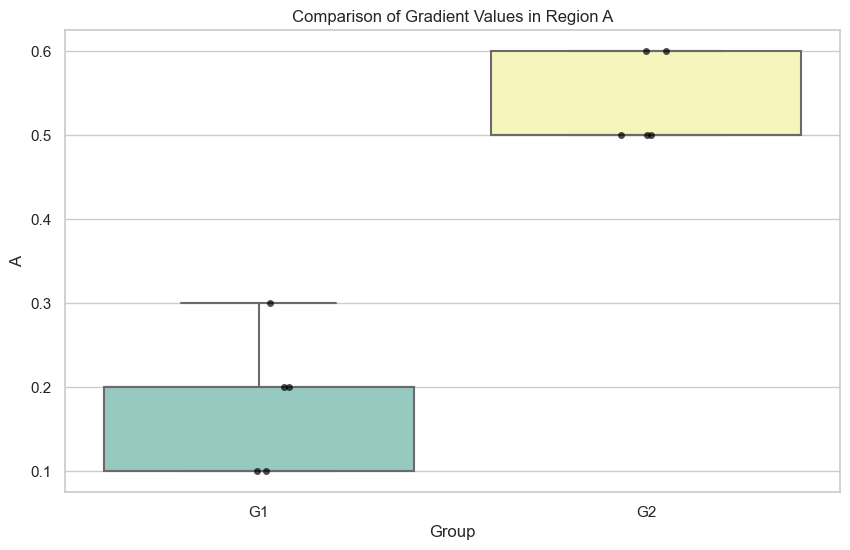

/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


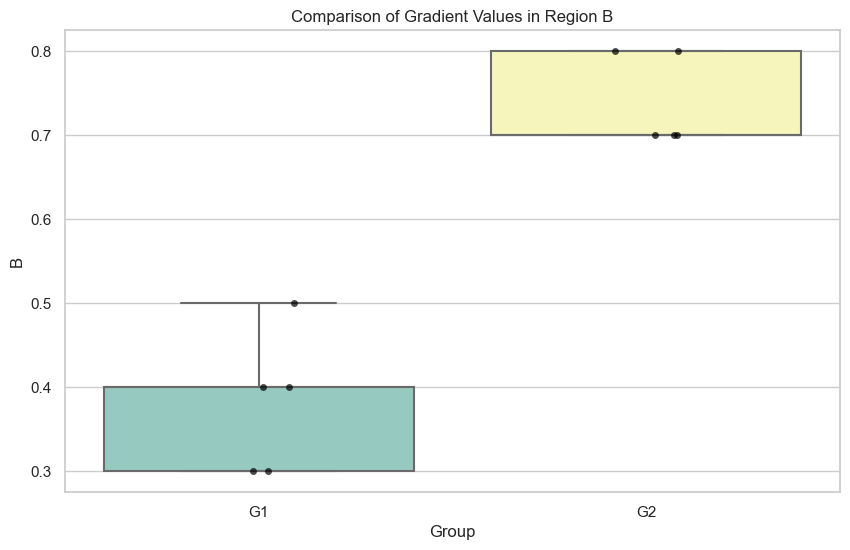

/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qingchen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


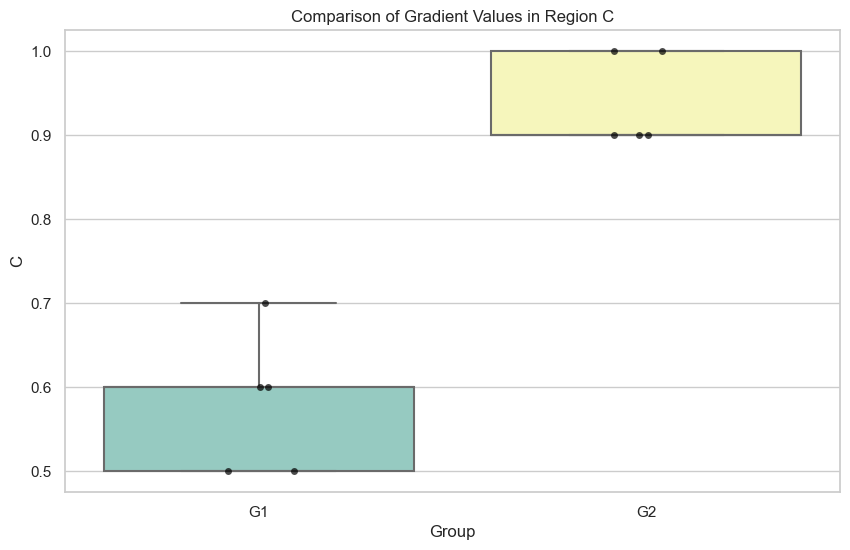

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# # 设置风格
# sns.set(style="whitegrid")
#
# # 绘制箱线图
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Group', y='A', data=df, palette="Set3")
# plt.title('Comparison of Gradient Values in Region A')
# plt.show()
#
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Group', y='B', data=df, palette="Set3")
# plt.title('Comparison of Gradient Values in Region B')
# plt.show()
#
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Group', y='C', data=df, palette="Set3")
# plt.title('Comparison of Gradient Values in Region C')
# plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 创建示例数据
data = {
    'Group': ['G1'] * 5 + ['G2'] * 5,
    'Subject': ['S1', 'S2', 'S3', 'S4', 'S5', 'S1', 'S2', 'S3', 'S4', 'S5'],
    'A': [0.2, 0.1, 0.3, 0.2, 0.1, 0.5, 0.6, 0.5, 0.6, 0.5],
    'B': [0.4, 0.3, 0.5, 0.4, 0.3, 0.7, 0.8, 0.7, 0.8, 0.7],
    'C': [0.6, 0.5, 0.7, 0.6, 0.5, 0.9, 1.0, 0.9, 1.0, 0.9]
}

df = pd.DataFrame(data)

# 设置风格
sns.set(style="whitegrid")

# 绘制箱线图和散点图 - 区域A
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='A', data=df, palette="Set3")
sns.stripplot(x='Group', y='A', data=df, color='black', alpha=0.7, jitter=True)
plt.title('Comparison of Gradient Values in Region A')
plt.show()

# 绘制箱线图和散点图 - 区域B
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='B', data=df, palette="Set3")
sns.stripplot(x='Group', y='B', data=df, color='black', alpha=0.7, jitter=True)
plt.title('Comparison of Gradient Values in Region B')
plt.show()

# 绘制箱线图和散点图 - 区域C
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='C', data=df, palette="Set3")
sns.stripplot(x='Group', y='C', data=df, color='black', alpha=0.7, jitter=True)
plt.title('Comparison of Gradient Values in Region C')
plt.show()


In [8]:
import numpy as np
from scipy import stats

# 组1的数据
group1 = {
    '脑区1': [0.5, 0.6, 0.7],
    '脑区2': [1.2, 1.5, 1.1],
    '脑区3': [0.9, 1.0, 0.8],
}

# 组2的数据
group2 = {
    '脑区1': [0.4, 0.5, 0.3],
    '脑区2': [1.0, 0.9, 1.1],
    '脑区3': [0.7, 0.6, 0.8],
}

# 对每个脑区进行t检验
for region in group1:
    # 合并两组数据
    data1 = np.array(group1[region])
    data2 = np.array(group2[region])

    # 进行独立样本t检验
    t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=True)  # equal_var参数根据方差齐性假设调整

    # 打印结果
    print(f"脑区 {region} 的t检验结果:")
    print(f"t统计量: {t_stat:.3f}, p值: {p_value:.3f}")

    # 判断p值是否小于显著性水平（例如0.05）
    if p_value < 0.05:
        print("两组间存在显著差异。")
    else:
        print("两组间没有显著差异。")


脑区 脑区1 的t检验结果:
t统计量: 2.449, p值: 0.070
两组间没有显著差异。
脑区 脑区2 的t检验结果:
t统计量: 2.000, p值: 0.116
两组间没有显著差异。
脑区 脑区3 的t检验结果:
t统计量: 2.449, p值: 0.070
两组间没有显著差异。
